## Задание 1

In [1]:
import pandas as pd

In [10]:
def class_for_rate(rate):
    if rate <= 2:
        return 'Низкий рейтинг'
    elif rate <= 4:
        return 'Средний рейтинг'
    else: 
        return 'Высокий рейтинг'

In [16]:
data = pd.read_csv('ml-latest-small/ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [22]:
data['class'] = data['rating'].apply(class_for_rate)
data.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,Средний рейтинг
1,1,1029,3.0,1260759179,Средний рейтинг
2,1,1061,3.0,1260759182,Средний рейтинг
3,1,1129,2.0,1260759185,Низкий рейтинг
4,1,1172,4.0,1260759205,Средний рейтинг


## Задание 2

In [48]:
import pandas as pd

In [49]:
data = pd.read_csv('ml-latest-small/keywords.csv')
data.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [50]:
def get_region(keyword):
    geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }
    list_of_keywords = keyword.split()
    result = 'undefined'
    for region, cities in geo_data.items():
        if len(list(x for x in list_of_keywords if x in cities)) > 0:
            result = region   
            break ## выход из цикла по первому нахождению 
    return result
        

In [52]:
data['region'] = data['keyword'].apply(get_region)
data[data['keyword'] == 'москва'].head()

,keyword,shows,region
1259,москва,153050,undefined


## Задание 3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
def production_year(film_name):
    years = list(range(1950, 2010))
    try:
        if int(film_name.split(' ')[-1][1:5]) in years:
            return int(film_name.split(' ')[-1][1:5])
        else:
            return 1900
    except:
        return 1900

In [6]:
movies['year'] = movies['title'].apply(production_year)
movies = movies.merge(ratings, on = 'movieId', how ='left')
movies

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1900,184.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1900,184.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,1900,184.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1900,184.0,3.5,1.537110e+09


In [7]:
movies.groupby(['year']).agg({'rating': 'mean'}).sort_values('rating', ascending=False)

,rating
year,
1957,4.039535
1954,4.009191
1962,3.969466
1952,3.953125
1964,3.940160
...,...
2000,3.398899
2005,3.359888
1992,3.354943


In [36]:
result = movies.groupby(['year']).agg({'rating': 'mean'}).sort_values('rating', ascending=False)
result

,rating
year,
1957,4.039535
1954,4.009191
1962,3.969466
1952,3.953125
1964,3.940160
...,...
2000,3.398899
2005,3.359888
1992,3.354943


<AxesSubplot:xlabel='year'>

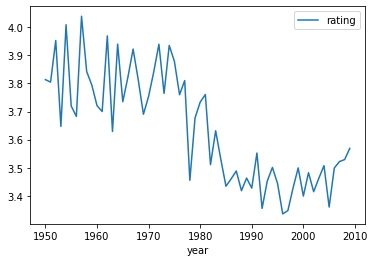

In [46]:
result = movies.groupby(['year']).agg({'rating': 'mean'}).sort_values('year')
result = result.reset_index()
result = result[result.year != 1900]
result.plot(y = 'rating', x = 'year',kind = 'line')

### Старые фильмы - лучше